In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Get the current working directory
cwd = os.getcwd()

# Get the path to the project's root directory
root_path = os.path.abspath(os.path.join(cwd, os.pardir))

# Add the project's root directory to the Python module search path
sys.path.append(root_path)

## Example

Given a system of linear equations represented as a square matrix $A$, our goal is to decompose this matrix into a lower triangular matrix $L$ and an upper triangular matrix $U$. This can be achieved through the LU Decomposition method. In some cases, we also have a permutation matrix $P$, in order to maintain numerical stability.

The LU Decomposition method is beneficial when we need to solve the same system of equations with different right-hand side vectors, as we can use the same $L$ and $U$ matrices and avoid unnecessary recomputation.

The lower triangular matrix $L$ has all entries above the main diagonal as zero and all diagonal entries as one, while the upper triangular matrix $U$ has all entries below the main diagonal as zero. The permutation matrix $P$ is used to interchange some rows for numerical stability.

Given a matrix $A = \begin{bmatrix} 3 & 2 \\ \ -1 & 4 \end{bmatrix}$, the following Python code demonstrates this process visually, and it displays the $L$, $U$, and $P$ matrices.

In [2]:
from implementation.lu_decomposition import lu_decomposition


def plot_matrix(matrix, name=""):
    # Converting the matrix into a DataFrame
    df = pd.DataFrame(matrix)

    # Converting all columns to float
    df = df.astype(np.float64)

    # Converting DataFrame to string and hiding index and columns
    df_str = df.to_string(float_format="{:.2f}".format, index=False, header=False)

    print(f"{name} matrix:")
    print(f"{df_str}\n")


# Create a 2D array
matrix = np.array([[3, 2], [-1, 4]])

# Get L, U, P matrices using LU decomposition
L, U, P = lu_decomposition(matrix)

# Plot original, L, U, and P matrices
plot_matrix(matrix, "Original")
plot_matrix(L, "L")
plot_matrix(U, "U")
plot_matrix(P, "P")

Original matrix:
 3.00 2.00
-1.00 4.00

L matrix:
 1.00 0.00
-0.33 1.00

U matrix:
3.00 2.00
0.00 4.00

P matrix:
1.00 0.00
0.00 1.00



Consider a system of linear equations that can be represented in matrix form as $Ax = b$, where $A$ is a matrix of coefficients, $x$ is a vector of variables, and $b$ is a vector of constants.

Our goal is to find the solution to this system of equations that satisfies all equations simultaneously. One approach to do this is through LU decomposition. This method involves breaking down the original matrix $A$ into two simpler matrices: a lower triangular matrix $L$ and an upper triangular matrix $U$. The original matrix $A$ can be represented as the product of $L$ and $U$.

LU decomposition is especially useful when we need to solve the same system of equations multiple times for different vectors $b$. It simplifies the system to a form that makes it more efficient to solve. First, we solve the equation $Ly = b$ for $y$, which is straightforward since $L$ is a lower triangular matrix. Then, we solve the equation $Ux = y$ for $x$, which is also simple because $U$ is an upper triangular matrix.

Given a matrix $A = \begin{bmatrix} 3 & 2 \\ \ -1 & 4 \end{bmatrix}$ and a vector $b = \begin{bmatrix} 12 \\ \ 10 \end{bmatrix}$, the Python code will perform LU decomposition on $A$, then solve the system using the resulting $L$ and $U$ matrices.

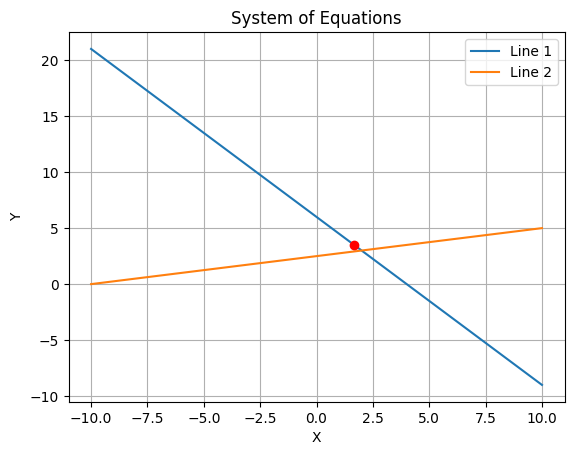

In [3]:
from implementation.lu_decomposition import solve_lu


def plot_system_of_equations(A, b):
    """Plot a system of equations defined by matrix A and vector b."""

    # Generate a range of x values
    x_values = np.linspace(-10, 10, 400)

    # Plot each equation
    for i in range(A.shape[0]):
        # Calculate the corresponding y values
        y_values = (b[i] - A[i, 0] * x_values) / A[i, 1]
        plt.plot(x_values, y_values, label=f"Line {i+1}")

    # Solve the system of equations for x
    x = solve_lu(A, b)

    # Plot the solution
    plt.plot(x[0], x[1], "ro")  # solution point

    # Set the labels and title
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("System of Equations")

    # Show the legend
    plt.legend()

    # Show the plot
    plt.grid()
    plt.show()


A = np.array([[3, 2], [-1, 4]])
b = np.array([12, 10])
plot_system_of_equations(A, b)